In [0]:
import tensorflow as tf 
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
print(tf.__version__)

2.2.0


In [11]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip -O /tmp/rockpaperscissors.zip

--2020-05-27 23:33:36--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  7.95MB/s    in 54s     

2020-05-27 23:34:32 (5.68 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [8]:
import zipfile,os
import shutil, sys 
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall("/tmp")
zip_ref.close()

base_dir = '/tmp/rockpaperscissors'

print('Jumlah Data Kertas:',len(os.listdir(os.path.join(base_dir, 'paper'))))
print('Jumlah Data Batu:',len(os.listdir(os.path.join(base_dir, 'rock'))))
print('Jumlah Data Gunting:',len(os.listdir(os.path.join(base_dir, 'scissors'))))

Jumlah Data Kertas: 712
Jumlah Data Batu: 726
Jumlah Data Gunting: 750


In [0]:
#ubah struktur folder 
!rm -rf /tmp/rockpaperscissors/rps-cv-images/
!rm /tmp/rockpaperscissors/README_rpc-cv-images.txt

In [0]:
#membagi dataset kedalam data latih dan uji 
from sklearn.model_selection import train_test_split
import pandas as pd


list_file_uji =  []
list_label_uji = []
list_file_validasi =[]
list_label_validasi = []

for label in os.listdir(base_dir):
  #label untuk setiap file yang ada pada direktori
  list_label=[]
  #direktori file
  list_file=[]
  for item in os.listdir(os.path.join(base_dir,label)):
    list_label.append(label)
    list_file.append(os.path.join(base_dir, label, item))

  file_latih,file_validasi,label_latih,label_validasi = train_test_split(list_file, list_label, train_size=500)
  list_file_uji += file_latih
  list_label_uji += label_latih
  list_file_validasi += file_validasi
  list_label_validasi += label_validasi

latih_df = pd.DataFrame({'labels': list_label_uji, 'filepath':list_file_uji})
validasi_df = pd.DataFrame({'labels':list_label_validasi, 'filepath': list_file_validasi})  

In [0]:
#Membuat DataImageGenerator
train_data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

test_data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

In [18]:
train_generator = train_data_gen.flow_from_dataframe(
    latih_df,
    class_mode='categorical',
    x_col='filepath',
    y_col='labels',
    target_size=(150,150),
    batch_size=4
)

val_generator = test_data_gen.flow_from_dataframe(
    validasi_df,
    class_mode='categorical',
    x_col='filepath',
    y_col='labels',
    target_size=(150,150),
    batch_size=4
)

Found 1500 validated image filenames belonging to 3 classes.
Found 688 validated image filenames belonging to 3 classes.


In [32]:
mymodel = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

mymodel.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy']
)

mymodel.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=val_generator,
    validation_steps=5,
    verbose=2
)

Epoch 1/20
25/25 - 6s - loss: 1.1304 - accuracy: 0.3700 - val_loss: 1.0988 - val_accuracy: 0.4000
Epoch 2/20
25/25 - 6s - loss: 1.0997 - accuracy: 0.3600 - val_loss: 1.0700 - val_accuracy: 0.4500
Epoch 3/20
25/25 - 6s - loss: 1.1002 - accuracy: 0.3400 - val_loss: 1.0932 - val_accuracy: 0.2000
Epoch 4/20
25/25 - 6s - loss: 1.0774 - accuracy: 0.4100 - val_loss: 0.9624 - val_accuracy: 0.6500
Epoch 5/20
25/25 - 6s - loss: 0.7637 - accuracy: 0.6500 - val_loss: 0.3861 - val_accuracy: 0.9000
Epoch 6/20
25/25 - 6s - loss: 0.7948 - accuracy: 0.6400 - val_loss: 0.6380 - val_accuracy: 0.8500
Epoch 7/20
25/25 - 6s - loss: 0.4698 - accuracy: 0.8500 - val_loss: 0.4798 - val_accuracy: 0.7500
Epoch 8/20
25/25 - 6s - loss: 0.7019 - accuracy: 0.7900 - val_loss: 0.3639 - val_accuracy: 0.8500
Epoch 9/20
25/25 - 6s - loss: 0.4141 - accuracy: 0.8300 - val_loss: 0.4091 - val_accuracy: 0.8000
Epoch 10/20
25/25 - 6s - loss: 0.4899 - accuracy: 0.8500 - val_loss: 0.2159 - val_accuracy: 0.9500
Epoch 11/20
25/25 -

Saving Gai.jpg to Gai (3).jpg
Gai.jpg
[[1. 0. 0.]]


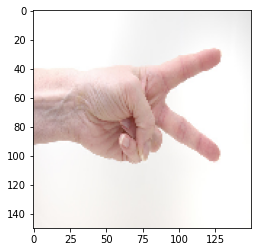

In [34]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # Memprediksi Gambar
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = mymodel.predict(images, batch_size=10)
  
  print(fn)
  print(classes)
 